# 단어 중심의 자연어처리

## 토큰화 (Tokenization) : 긴 글을 "이해하기 쉬운 작은 조각들"로 나누는 것

## 1. konlpy 라이브러리 설치

In [1]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 27.6 MB/s eta 0:00:00


## 2. kolaw 라이브러리에서  대한민국 헌법 (constitution.txt) 가져오기

- 출처: https://konlpy.org/ko/latest/data/
- kolaw.open('constitution.txt').read() 사용

In [2]:
#kolaw 라이브러리 가져오기

from konlpy.corpus import kolaw


In [3]:
# kolaw 라이브러리 내 constitution 파일 읽기

c = kolaw.open('constitution.txt').read()
print(c)

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.
  제8조 ① 정당의 설립은 자유이며, 복수정당제

## 3. okt 라이브러리 import 하고 okt 변수로 저장

In [18]:
from konlpy.tag import Okt

okt = Okt()

## 4. 해당문서 명사만 뽑아보기

- 처음 20개 글자 추출해보기
- 처음 20개 글자에 대한 명사 추출해보기

In [5]:
c[:20]

'대한민국헌법\n\n유구한 역사와 전통에 '

In [6]:
okt.nouns(c[:20])

['대한민국', '헌법', '유구', '역사', '전통']

## 5. 워드크라우드
- 한글 폰트 설치 (https://github.com/citydataviz/FastCampus/blob/main/Part4/Project1/%ED%95%9C%EA%B8%80%20%EA%B7%B8%EB%9E%98%ED%94%84%20%ED%8C%A8%EC%B9%98.txt)
- 워드크라우드 실행

In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,624 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124574 files and dire

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

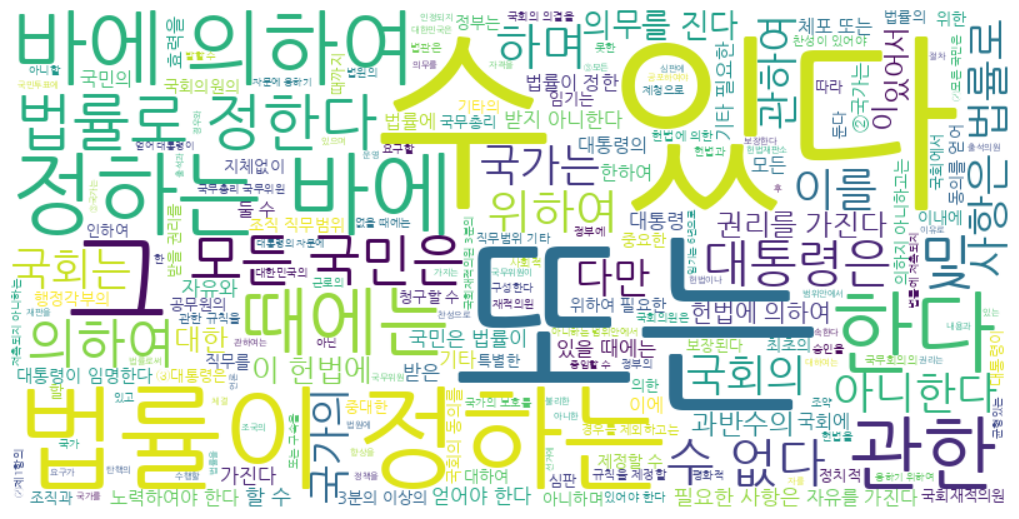

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color="white",
    width=800,
    height=400,
    # Optional: Add more parameters if needed
    # max_words=100,  # Limit the number of words
    # max_font_size=100  # Limit the maximum font size
).generate(c)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.tight_layout(pad=0)
plt.show()

충분한가요?

## 6. 불용어 (stopwords)

- https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a
- 불용어 리스트 보기
- 불용어 추가해 보기

In [13]:
from konlpy.tag import Okt
import requests

# 불용어 리스트 URL
url = "https://gist.githubusercontent.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a/raw/4f7a635040442a995568270ac8156448f2d1f0cb/stopwords-ko.txt"

def get_stopwords(url):
    """
    주어진 URL에서 텍스트 데이터를 가져와 불용어 리스트로 반환
    """
    response = requests.get(url)
    if response.status_code == 200:
        # 데이터를 텍스트로 변환하고 줄 단위로 나눔
        stopwords = response.text.splitlines()
        return stopwords
    else:
        raise Exception(f"Failed to fetch stopwords: {response.status_code}")

# 불용어 리스트 가져오기
stopwords = get_stopwords(url)

stopwords




['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [14]:
def remove_stopwords(text):
    # 텍스트를 형태소로 분리
    words = okt.morphs(text)
    # 불용어를 제외한 단어 리스트 생성
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)

# 불용어 제거
filtered_text = remove_stopwords(c)
print(filtered_text)

대한민국 헌법 

 유구 한 역사 전통 빛나는 대 한 국민 은 3 · 1 운동 건립 된 대한민국 임시정부 법 통과 불의 항거 한 4 · 19 민주 이념 계승 하고 , 조국 민주 개혁 평화 적 통일 사명 입 각하 정의 · 인도 동포 애 민족 단결 공고 히 하고 , 모든 사회 적 폐습 불의 타파 하며 , 자율 조화 바탕 자유민주 적 기 본 질서 더욱 확고히 하여 정치 · 경제 · 사회 · 문화 모든 영역 있어서 각인 기회 균등히 하고 , 능력 최고 도로 발휘 하게 하며 , 자유 권리 따르는 책임 의무 완수 하게 하여 , 안 으로는 국민 생활 균등한 향상 기하 고 밖 으로는 항구 적 인 세계 평화 인류 공영 이바지 함 자손 안전 자유 행복 영원히 확보 할 다짐 1948년 7월 12일 제정 되고 8 차 걸쳐 개정 된 헌법 이제 국회 의결 거쳐 국민투표 의하여 개정 한다 . 

        1 장 총 강 
   1조 ① 대한민국 은 민주공화국 이다 . 
 ② 대한민국 주권 은 국민 있고 , 모든 권력 은 국민 으로부터 나온다 . 
   2조 ① 대한민국 국민 되는 요건 은 법률 정 한다 . 
 ② 국가 는 법률 정 하는 바 의하여 재외국민 보호 할 의무 진다 . 
   3조 대한민국 영토 는 한반도 부속 도서 한다 . 
   4조 대한민국 은 통일 지향 하며 , 자유민주 적 기 본 질서 입각 한 평화 적 통일 정책 수립 하고 이를 추진 한 다 . 
   5조 ① 대한민국 은 국제 평화 유지 노력 하고 침략 적 전쟁 부인 한다 . 
 ② 국군 은 국가 안전보장 국토 방위 신성한 의무 수행 함 사명 하며 , 정치 적 중립성 은 준수 된다 . 
   6조 ① 헌법 의하여 체결 · 공포 된 조약 일반 적 승인 된 국제 법규 는 국내법 같은 효력 가진다 . 
 ② 외국인 은 국제 법 조약 정 하는 바 의하여 지위 보장 된다 . 
   7조 ① 공무원 은 국민 전체 대한 봉사자 이며 , 국민 대하 책임 진다 . 
 ② 공무원 신분 정치 적 중립성 은 법률 정 하는 바 의하여 보

##7. 불용어 적용 후 명사 갯수 비교

In [16]:
len(okt.nouns(c))

3882

In [17]:
len(okt.nouns(filtered_text))

3738

## 8. 워드크라우드 생성

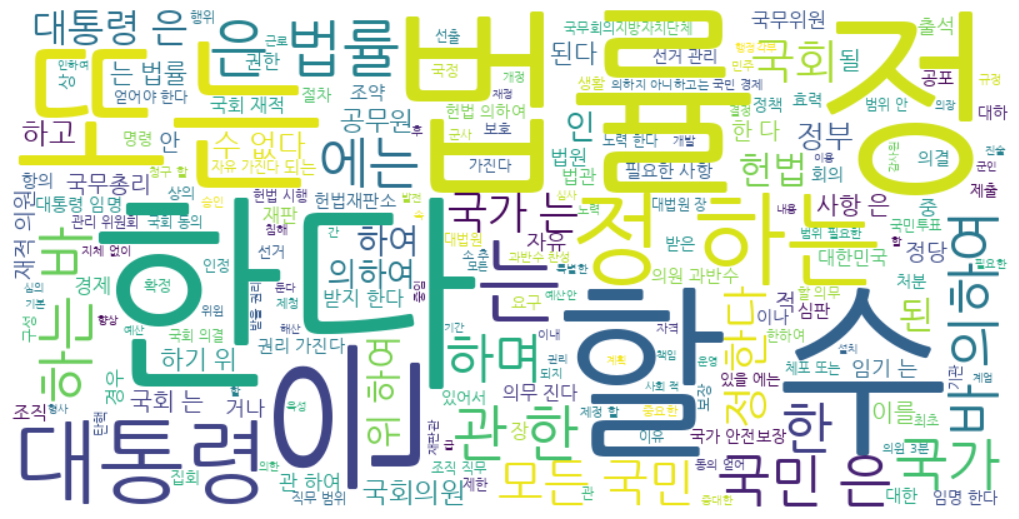

In [18]:
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color="white",
    width=800,
    height=400,
    # Optional: Add more parameters if needed
    # max_words=100,  # Limit the number of words
    # max_font_size=100  # Limit the maximum font size
).generate(filtered_text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.tight_layout(pad=0)
plt.show()

## 9. 불용어에 내가 원하는 단어 추가

In [29]:
added= ['또는','법률','한다','할','수','정하는','의하여','하며','관한']

stopwords.extend(added)

In [30]:
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [31]:
filtered_text2 = remove_stopwords(c)

## 10. 다시 워드크라우드

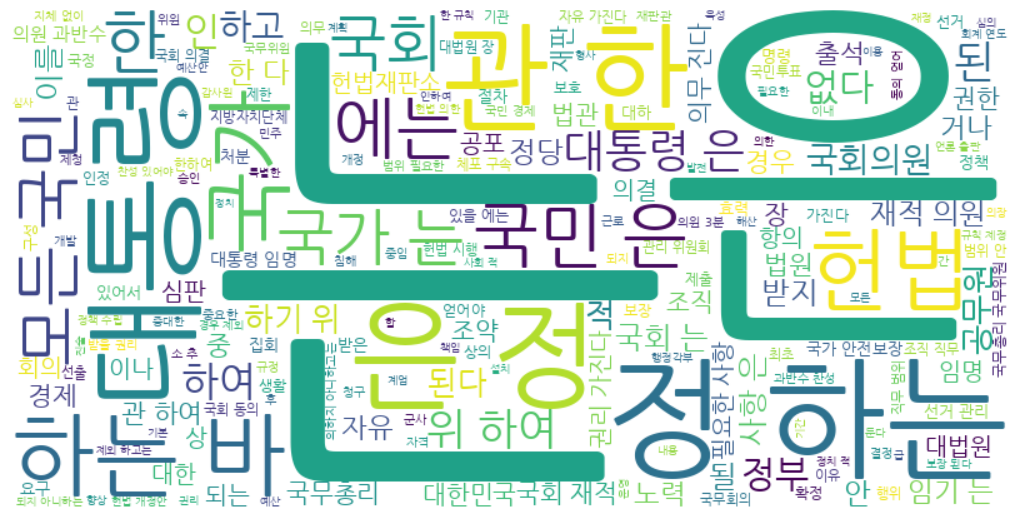

In [32]:
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color="white",
    width=800,
    height=400,
    # Optional: Add more parameters if needed
    # max_words=100,  # Limit the number of words
    # max_font_size=100  # Limit the maximum font size
).generate(filtered_text2)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.tight_layout(pad=0)
plt.show()

# 11. Tf-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 샘플 문서 리스트
corpus = c.splitlines()

# TfidfVectorizer 초기화
vectorizer = TfidfVectorizer()

# TF-IDF 계산
X = vectorizer.fit_transform(corpus)

# TF-IDF 벡터를 배열로 변환
tfidf_matrix = X.toarray()

# 단어 목록 출력
vocab = vectorizer.get_feature_names_out()
print("단어 목록:", vocab)

# TF-IDF 행렬 출력
print("\nTF-IDF 행렬:")
print(tfidf_matrix)

# TF-IDF 결과를 보기 좋게 출력
import pandas as pd

tfidf_df = pd.DataFrame(tfidf_matrix, columns=vocab)
print("\nTF-IDF 데이터프레임:")
tfidf_df

단어 목록: ['10' '100일을' '10년으로' ... '후임자를' '훈련등' '훈장']

TF-IDF 행렬:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

TF-IDF 데이터프레임:


,10,100일을,10년으로,11,11인,12,12일에,13,14,15,...,획정,효력을,효력이,효율적이고,후가,후보자에게,후임자가,후임자를,훈련등,훈장
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.102581,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.329455,0.0,0.0,0.0
352,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
353,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
354,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.282222,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [7]:
tfidf_df['훈장'].T.value_counts()

,count
훈장,
0.000000,355
0.408095,1


In [10]:
# 3번째 문장에서 값이 0이 아닌 것들의 단어 중요도를 보자

tfidf_df.iloc[2][tfidf_df.iloc[2] != 0]

,2
12일에,0.102581
1948년,0.102581
19민주이념을,0.102581
1운동으로,0.102581
7월,0.102581
...,...
행복을,0.095856
향상을,0.091084
헌법을,0.087383
확고히,0.102581


- 한국어는 여전히 체언과 조사가 섞인 상태로 단어를 판단하기 때문에 정확하지 않은 결과 도출될 가능성 높다.

In [48]:
# 전체 문서에서 각 단어들의 중요도 평균 계산
word_importance = tfidf_df.mean(axis=0)
word_importance

,0
10,0.002299
100일을,0.000924
10년으로,0.001066
11,0.001134
11인,0.000925
...,...
후보자에게,0.001021
후임자가,0.000925
후임자를,0.001595
훈련등,0.000621


In [53]:
word_importance.sort_values(ascending=False).head(10)

,0
한다,0.026102
의하여,0.025935
법률이,0.025089
정하는,0.024206
또는,0.024127
있다,0.023221
법률로,0.021464
정한다,0.020650
국민은,0.019664
바에,0.019641


# 맥락 중심의 자연어 처리
## 12. 한국어BERT
- 런타임 유형 변경 : CPU -> GPU

In [1]:
pip install transformers


In [2]:
from transformers import TFBertForMaskedLM
from transformers import AutoTokenizer

In [3]:
model = TFBertForMaskedLM.from_pretrained('klue/bert-base', from_pt=True)
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForMaskedLM: ['cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForMaskedLM from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForMaskedLM from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

## 13. '축구는 정말 재미있는 [MASK]다.' 에서 MASK 에 들어갈 말을 예측해주세요

In [4]:
inputs = tokenizer('축구는 정말 재미있는 [MASK]다.', return_tensors='tf')


In [5]:
print(inputs['input_ids'])


tf.Tensor([[   2 4713 2259 3944 6001 2259    4  809   18    3]], shape=(1, 10), dtype=int32)


In [ ]:
inputs


{'input_ids': <tf.Tensor: shape=(1, 10), dtype=int32, numpy=
array([[   2, 4713, 2259, 3944, 6001, 2259,    4,  809,   18,    3]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 10), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 10), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [6]:
from transformers import FillMaskPipeline
pip = FillMaskPipeline(model=model, tokenizer=tokenizer)

Device set to use 0


In [7]:
pip('축구는 정말 재미있는 [MASK]다.')


[{'score': 0.8963510394096375,
  'token': 4559,
  'token_str': '스포츠',
  'sequence': '축구는 정말 재미있는 스포츠 다.'},
 {'score': 0.025957662612199783,
  'token': 568,
  'token_str': '거',
  'sequence': '축구는 정말 재미있는 거 다.'},
 {'score': 0.01003393717110157,
  'token': 3682,
  'token_str': '경기',
  'sequence': '축구는 정말 재미있는 경기 다.'},
 {'score': 0.007924343459308147,
  'token': 4713,
  'token_str': '축구',
  'sequence': '축구는 정말 재미있는 축구 다.'},
 {'score': 0.0078441696241498,
  'token': 5845,
  'token_str': '놀이',
  'sequence': '축구는 정말 재미있는 놀이 다.'}]

## 14. "어벤져스는 정말 재미있는 [MASK]다."에서 MASK에 들어갈 말을 예측해 보세요

In [8]:
pip('어벤져스는 정말 재미있는 [MASK]다.')


[{'score': 0.838240921497345,
  'token': 3771,
  'token_str': '영화',
  'sequence': '어벤져스는 정말 재미있는 영화 다.'},
 {'score': 0.028275661170482635,
  'token': 568,
  'token_str': '거',
  'sequence': '어벤져스는 정말 재미있는 거 다.'},
 {'score': 0.01718938536942005,
  'token': 4665,
  'token_str': '드라마',
  'sequence': '어벤져스는 정말 재미있는 드라마 다.'},
 {'score': 0.014989731833338737,
  'token': 3758,
  'token_str': '이야기',
  'sequence': '어벤져스는 정말 재미있는 이야기 다.'},
 {'score': 0.009382669813930988,
  'token': 4938,
  'token_str': '장소',
  'sequence': '어벤져스는 정말 재미있는 장소 다.'}]

## 15. BERT 임베딩 보기

In [ ]:
# BERT 임베딩 레이어 가져오기
embedding_layer = model.bert.embeddings

# 토큰 임베딩 계산
token_embeddings = embedding_layer(inputs['input_ids'])

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
print("\n토큰 목록:")
for i, token in enumerate(tokens):
    print(f"토큰 {i}: {token}")


토큰 목록:
토큰 0: [CLS]
토큰 1: 축구
토큰 2: ##는
토큰 3: 정말
토큰 4: 재미있
토큰 5: ##는
토큰 6: [MASK]
토큰 7: 다
토큰 8: .
토큰 9: [SEP]


In [ ]:
token_embeddings

<tf.Tensor: shape=(1, 10, 768), dtype=float32, numpy=
array([[[-0.4685507 , -0.21188863,  0.6434475 , ..., -0.5501709 ,
         -0.8391096 , -0.3036916 ],
        [ 1.3195705 , -0.5496102 , -0.9343418 , ..., -1.546345  ,
          0.8113903 , -0.61873305],
        [-1.0154032 ,  0.33131182, -3.1590524 , ...,  0.41119307,
          0.8380163 ,  0.8035649 ],
        ...,
        [-0.00905166,  0.3392484 , -0.7693187 , ..., -0.02681683,
          1.4045023 , -0.72268414],
        [ 0.21764818, -0.3322873 , -0.7440843 , ..., -0.67602813,
          0.36110094,  0.20591448],
        [ 0.01199826, -0.09149452, -0.88958186, ..., -0.5452573 ,
         -0.04635842, -0.03345777]]], dtype=float32)>

참고: https://maartengr.github.io/BERTopic/index.html

## 16. BERT 토픽모델링

In [9]:
!pip install BERTopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00


In [22]:
from bertopic import BERTopic
import re

def preprocess_text(text):
    # 문장 단위로 분리
    sentences = text.split('.')

    # 전처리된 문장 저장
    cleaned_sentences = []

    for sentence in sentences:
    #     if sentence.strip():  # 빈 문장 제외
    #         # 기본적인 클리닝만 수행
    #         cleaned = re.sub(r'[^\w\s가-힣]', ' ', sentence)  # 한글 포함
    #         cleaned = re.sub(r'\s+', ' ', cleaned).strip()
        if len(sentence) > 10:  # 너무 짧은 문장 제외
            cleaned_sentences.append(sentence)

    # print(f"전처리된 문장 수: {len(cleaned_sentences)}")
    return cleaned_sentences

def perform_topic_modeling(text, num_topics=10):
    # 텍스트 전처리
    processed_docs = preprocess_text(text)

    if len(processed_docs) < 2:
        raise ValueError("처리된 문서가 너무 적습니다. 최소 2개 이상의 문장이 필요합니다.")

    print(f"처리된 문서의 첫 번째 예시: {processed_docs[0]}")

    # BERTopic 모델 설정
    topic_model = BERTopic(
        language="korean",
        nr_topics=min(num_topics, len(processed_docs)-1),  # 문서 수보다 작게 설정
        min_topic_size=2,  # 최소 토픽 크기 설정
        verbose=True
    )

    # 토픽 모델링 수행
    topics, probs = topic_model.fit_transform(processed_docs)

    return topic_model, topics, processed_docs

def analyze_results(topic_model, topics, docs):
    topic_info = topic_model.get_topics()

    print("\n=== 토픽 분석 결과 ===")
    if not topic_info:
        print("추출된 토픽이 없습니다.")
        return

    for topic_id, topic_info in topic_info.items():
        if topic_id != -1:  # -1은 아웃라이어 토픽
            print(f"\n토픽 {topic_id}:")
            for word, score in topic_info[:10]:  # 상위 10개 단어만 출력
                print(f"- {word}: {score:.4f}")

def main(constitution_text):
    try:
        # 입력 텍스트 확인
        if not constitution_text or not isinstance(constitution_text, str):
            raise ValueError("유효한 텍스트가 입력되지 않았습니다.")

        print(f"입력 텍스트 길이: {len(constitution_text)}")

        # 토픽 모델링 수행
        topic_model, topics, processed_docs = perform_topic_modeling(constitution_text)

        # 결과 분석
        analyze_results(topic_model, topics, processed_docs)

        return topic_model, processed_docs

    except Exception as e:
        print(f"에러 발생: {str(e)}")
        return None

# 실행 전 텍스트 확인
print("입력 텍스트 샘플:")
print(c[:200] if c else "텍스트가 비어있습니다.")

# 실행
topic_model, processed_docs = main(c)

2025-01-25 11:56:55,176 - BERTopic - Embedding - Transforming documents to embeddings.


입력 텍스트 샘플:
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제
입력 텍스트 길이: 18884
처리된 문서의 첫 번째 예시: 대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

2025-01-25 11:57:09,592 - BERTopic - Embedding - Completed ✓
2025-01-25 11:57:09,595 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-25 11:57:24,827 - BERTopic - Dimensionality - Completed ✓
2025-01-25 11:57:24,830 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-25 11:57:24,853 - BERTopic - Cluster - Completed ✓
2025-01-25 11:57:24,854 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-25 11:57:24,962 - BERTopic - Representation - Completed ✓
2025-01-25 11:57:24,965 - BERTopic - Topic reduction - Reducing number of topics
2025-01-25 11:57:25,016 - BERTopic - Topic reduction - Reduced number of topics from 48 to 10



=== 토픽 분석 결과 ===

토픽 0:
- 정한다: 0.0579
- 법률로: 0.0565
- 또는: 0.0501
- 정하는: 0.0422
- 법률이: 0.0421
- 관한: 0.0416
- 사항은: 0.0403
- 의하여: 0.0375
- 필요한: 0.0364
- 기타: 0.0364

토픽 1:
- 때에는: 0.0471
- 한다: 0.0466
- 국회의: 0.0453
- 있다: 0.0347
- 대통령은: 0.0344
- 국회재적의원: 0.0339
- 또는: 0.0317
- 3분의: 0.0316
- 이상의: 0.0308
- 대통령이: 0.0290

토픽 2:
- 모든: 0.2046
- 국민은: 0.1937
- 가진다: 0.1415
- 자유를: 0.0880
- 권리를: 0.0815
- 진다: 0.0665
- 법률이: 0.0640
- 정하는: 0.0591
- 바에: 0.0569
- 의하여: 0.0526

토픽 3:
- 아니한다: 0.1180
- 침해받지: 0.0875
- 국민은: 0.0749
- 한다: 0.0748
- 받지: 0.0663
- 불이익한: 0.0631
- 처우를: 0.0631
- 인하여: 0.0523
- 모든: 0.0475
- 자유를: 0.0454

토픽 4:
- ②국가는: 0.0994
- 국가는: 0.0987
- 노력하여야: 0.0934
- 위하여: 0.0912
- 의무를: 0.0829
- 균형있는: 0.0753
- 진다: 0.0705
- 한다: 0.0599
- 계획을: 0.0433
- 통하여: 0.0433

토픽 5:
- 없다: 0.1772
- 또는: 0.1023
- 경우를: 0.0945
- 제외하고는: 0.0945
- 국회의원은: 0.0744
- 회기중: 0.0570
- 겸할: 0.0570
- 면한: 0.0570
- 가입하거나: 0.0570
- 관여할: 0.0570

토픽 6:
- 대한민국은: 0.0980
- 대한민국의: 0.0923
- 자유와: 0.0786
- 하여: 0.0707
- 하고: 0.0707
- 자유민주적: 0.0707
- 경제:

In [29]:
topic_model.visualize_topics()

In [33]:
  topic_model.visualize_barchart()


In [25]:
topic_model.visualize_heatmap()


In [26]:
topic_model.visualize_hierarchy()

In [35]:
topic_model.get_topics()

{-1: [('있다', 0.03784625657253493),
  ('의하여', 0.03750785703504316),
  ('또는', 0.03269547820904716),
  ('헌법에', 0.032330353045551534),
  ('국가의', 0.026335205646033706),
  ('법률이', 0.02312826790543801),
  ('아니한다', 0.02289874726280087),
  ('위하여', 0.022600547064937793),
  ('관한', 0.02201002566048655),
  ('직무를', 0.02129488168795998)],
 0: [('정한다', 0.05791110279769416),
  ('법률로', 0.056543978018808796),
  ('또는', 0.050055461220971584),
  ('정하는', 0.042211536198348235),
  ('법률이', 0.04209395833359991),
  ('관한', 0.04161657236052185),
  ('사항은', 0.04029735756343851),
  ('의하여', 0.037545820453094826),
  ('필요한', 0.0363854122294007),
  ('기타', 0.0363854122294007)],
 1: [('때에는', 0.047079816049991764),
  ('한다', 0.046606134109361534),
  ('국회의', 0.04530940530978428),
  ('있다', 0.03469591003915187),
  ('대통령은', 0.03438311961466425),
  ('국회재적의원', 0.03394031232096056),
  ('또는', 0.03173705550161714),
  ('3분의', 0.03161635269613452),
  ('이상의', 0.030754829738714032),
  ('대통령이', 0.02897165559947423)],
 2: [('모든', 0.20463534

In [37]:
 topic_model.get_document_info(processed_docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된...,6,6_대한민국은_대한민국의_자유와_하여,"[대한민국은, 대한민국의, 자유와, 하여, 하고, 자유민주적, 경제, 평화적, 인류...","[\n 제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통...",대한민국은 - 대한민국의 - 자유와 - 하여 - 하고 - 자유민주적 - 경제 - 평...,0.167614,True
1,\n\n 제1장 총강\n 제1조 ① 대한민국은 민주공화국이다,6,6_대한민국은_대한민국의_자유와_하여,"[대한민국은, 대한민국의, 자유와, 하여, 하고, 자유민주적, 경제, 평화적, 인류...","[\n 제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통...",대한민국은 - 대한민국의 - 자유와 - 하여 - 하고 - 자유민주적 - 경제 - 평...,0.943213,False
2,"\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다",2,2_모든_국민은_가진다_자유를,"[모든, 국민은, 가진다, 자유를, 권리를, 진다, 법률이, 정하는, 바에, 의하여]","[\n 제32조 ① 모든 국민은 근로의 권리를 가진다, \n 제25조 모든 국민...",모든 - 국민은 - 가진다 - 자유를 - 권리를 - 진다 - 법률이 - 정하는 - ...,1.000000,False
3,\n 제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다,6,6_대한민국은_대한민국의_자유와_하여,"[대한민국은, 대한민국의, 자유와, 하여, 하고, 자유민주적, 경제, 평화적, 인류...","[\n 제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통...",대한민국은 - 대한민국의 - 자유와 - 하여 - 하고 - 자유민주적 - 경제 - 평...,0.099038,False
4,\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다,4,4_②국가는_국가는_노력하여야_위하여,"[②국가는, 국가는, 노력하여야, 위하여, 의무를, 균형있는, 진다, 한다, 계획을...","[\n②국가는 균형있는 국민경제의 성장 및 안정과 적정한 소득의 분배를 유지하고, ...",②국가는 - 국가는 - 노력하여야 - 위하여 - 의무를 - 균형있는 - 진다 - 한...,0.798438,False
...,...,...,...,...,...,...,...,...
348,"다만, 이 헌법에 의하여 선임방법이나 임명권자가 변경된 공무원과 대법원장 및 감사...",-1,-1_있다_의하여_또는_헌법에,"[있다, 의하여, 또는, 헌법에, 국가의, 법률이, 아니한다, 위하여, 관한, 직무를]",[\n 제77조 ① 대통령은 전시·사변 또는 이에 준하는 국가비상사태에 있어서 병...,있다 - 의하여 - 또는 - 헌법에 - 국가의 - 법률이 - 아니한다 - 위하여 -...,0.000000,False
349,\n②이 헌법시행 당시의 대법원장과 대법원판사가 아닌 법관은 제1항 단서의 규정에 ...,-1,-1_있다_의하여_또는_헌법에,"[있다, 의하여, 또는, 헌법에, 국가의, 법률이, 아니한다, 위하여, 관한, 직무를]",[\n 제77조 ① 대통령은 전시·사변 또는 이에 준하는 국가비상사태에 있어서 병...,있다 - 의하여 - 또는 - 헌법에 - 국가의 - 법률이 - 아니한다 - 위하여 -...,0.000000,False
350,\n③이 헌법중 공무원의 임기 또는 중임제한에 관한 규정은 이 헌법에 의하여 그 공...,1,1_때에는_한다_국회의_있다,"[때에는, 한다, 국회의, 있다, 대통령은, 국회재적의원, 또는, 3분의, 이상의,...",[\n 제130조 ① 국회는 헌법개정안이 공고된 날로부터 60일 이내에 의결하여야...,때에는 - 한다 - 국회의 - 있다 - 대통령은 - 국회재적의원 - 또는 - 3분의...,0.697988,False
351,\n제5조 이 헌법시행 당시의 법령과 조약은 이 헌법에 위배되지 아니하는 한 그 효...,1,1_때에는_한다_국회의_있다,"[때에는, 한다, 국회의, 있다, 대통령은, 국회재적의원, 또는, 3분의, 이상의,...",[\n 제130조 ① 국회는 헌법개정안이 공고된 날로부터 60일 이내에 의결하여야...,때에는 - 한다 - 국회의 - 있다 - 대통령은 - 국회재적의원 - 또는 - 3분의...,0.592999,False


https://www.data.go.kr/data/15004274/fileData.do